In [1]:
import pandas as pd

In [2]:
from IPython.core.display import HTML

In [3]:
titles = pd.read_csv('titles.csv',index_col=None)

In [4]:
titles.head()

,title,year
0,Tasveer Mere Sanam,1996
1,Only You,1994
2,El pueblo del terror,1970
3,Machine,2007
4,MARy,2008


In [8]:
cast = pd.read_csv('cast.csv',index_col=None)

In [9]:
cast.head()

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN


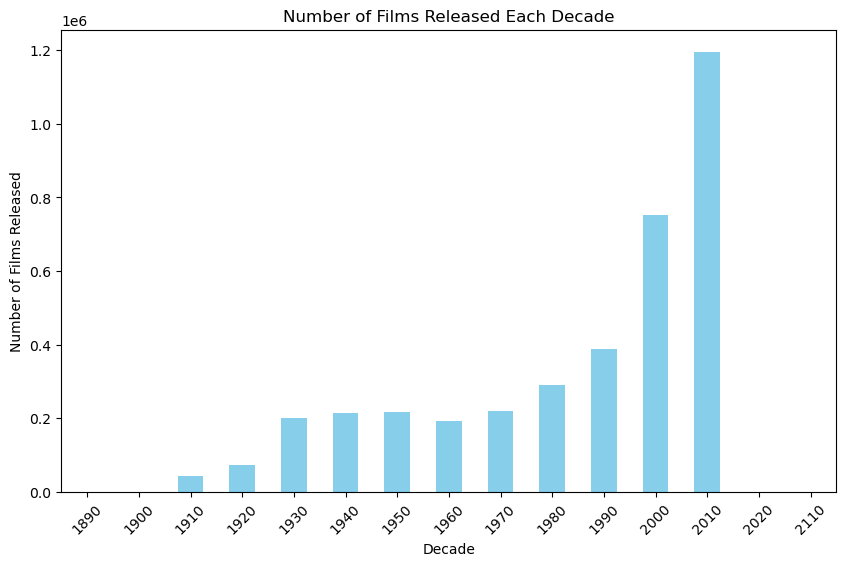

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
cast['decade'] = (cast['year'] // 10) * 10

# Group the DataFrame by 'decade' and count the number of films for each decade
films_per_decade = cast.groupby('decade')['title'].count()

# Create a bar plot
plt.figure(figsize=(10, 6))
films_per_decade.plot(kind='bar', color='skyblue')
plt.xlabel('Decade')
plt.ylabel('Number of Films Released')
plt.title('Number of Films Released Each Decade')
plt.xticks(rotation=45)
plt.show()


C:\Users\user\AppData\Local\Temp\ipykernel_3136\3161980118.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hamlet_films['decade'] = (hamlet_films['year'] // 10) * 10


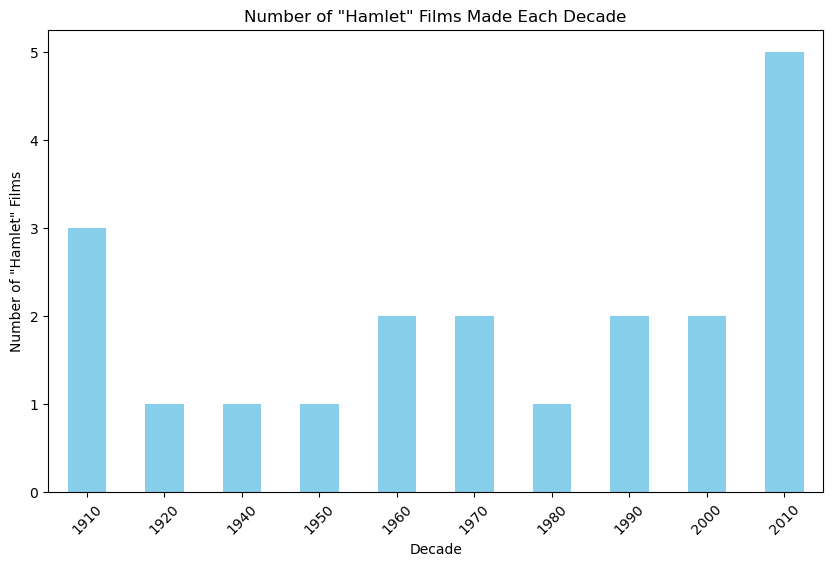

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

hamlet_films = titles[titles['title'] == 'Hamlet']

# Create a new column 'decade' by rounding down the 'year' to the nearest decade
hamlet_films['decade'] = (hamlet_films['year'] // 10) * 10

# Group the DataFrame by 'decade' and count the number of "Hamlet" films for each decade
hamlet_counts_per_decade = hamlet_films.groupby('decade')['title'].count()

# Create a bar plot
plt.figure(figsize=(10, 6))
hamlet_counts_per_decade.plot(kind='bar', color='skyblue')
plt.xlabel('Decade')
plt.ylabel('Number of "Hamlet" Films')
plt.title('Number of "Hamlet" Films Made Each Decade')
plt.xticks(rotation=45)
plt.show()


In [12]:
leading_roles_actors = cast[(cast['year'] >= 1950) & (cast['year'] <= 1959) & (cast['n'] == 1) & (cast['type'] == 'actor')]
leading_roles_actresses = cast[(cast['year'] >= 1950) & (cast['year'] <= 1959) & (cast['n'] == 1) & (cast['type'] == 'actress')]

leading_roles_actors_by_year = leading_roles_actors.groupby('year')['n'].count()
leading_roles_actresses_by_year = leading_roles_actresses.groupby('year')['n'].count()

print("Leading roles (n=1) available to actors in each year of the 1950s:")
print(leading_roles_actors_by_year)

print("\nLeading roles (n=1) available to actresses in each year of the 1950s:")
print(leading_roles_actresses_by_year)


Leading roles (n=1) available to actors in each year of the 1950s:
year
1950    625
1951    651
1952    613
1953    664
1954    636
1955    648
1956    668
1957    739
1958    715
1959    733
Name: n, dtype: int64

Leading roles (n=1) available to actresses in each year of the 1950s:
year
1950    288
1951    285
1952    304
1953    312
1954    316
1955    285
1956    307
1957    315
1958    301
1959    327
Name: n, dtype: int64


In [13]:
cast_1950s = cast[(cast['year'] >= 1950) & (cast['year'] <= 1959)]

# Group the filtered DataFrame by 'type' (actor or actress) and 'n' (1 through 5) and count the number of roles
roles_by_type_and_n = cast_1950s.groupby(['type', 'n'])['n'].count()

print("Total roles available to actors and actresses in the 1950s, by 'n' (1 through 5):")
print(roles_by_type_and_n)


Total roles available to actors and actresses in the 1950s, by 'n' (1 through 5):
type     n    
actor    1.0      6692
         2.0      4640
         3.0      5654
         4.0      5663
         5.0      5674
                  ... 
actress  162.0       1
         163.0       1
         164.0       1
         418.0       1
         788.0       1
Name: n, Length: 260, dtype: int64


In [14]:
pink_panther_movies = cast[cast['title'].str.contains('Pink Panther', case=False, regex=False)]

# Group the DataFrame by 'title' (movie) and count the number of roles for each movie
roles_per_movie = pink_panther_movies.groupby('title')['character'].count()

print("Number of roles listed for each Pink Panther movie:")
print(roles_per_movie)


Number of roles listed for each Pink Panther movie:
title
Curse of the Pink Panther          67
Revenge of the Pink Panther        68
Son of the Pink Panther            46
The Pink Panther                  111
The Pink Panther 2                 84
The Pink Panther Strikes Again     70
The Return of the Pink Panther     30
Trail of the Pink Panther          41
Name: character, dtype: int64


In [15]:
frank_oz_roles = cast[cast['name'] == 'Frank Oz']

# Group the filtered DataFrame by 'title' and 'year', and count the number of roles for each film
roles_per_film = frank_oz_roles.groupby(['title', 'year'])['character'].count()

# Filter films where Frank Oz played more than 1 role
films_with_multiple_roles = roles_per_film[roles_per_film > 1]

# Display the list of films ordered by year
films_with_multiple_roles.sort_index(level='year')


title                                 year
The Muppet Movie                      1979    8
An American Werewolf in London        1981    2
The Great Muppet Caper                1981    6
The Dark Crystal                      1982    2
The Muppets Take Manhattan            1984    7
Follow That Bird                      1985    3
The Muppet Christmas Carol            1992    7
Muppet Treasure Island                1996    4
Muppets from Space                    1999    4
The Adventures of Elmo in Grouchland  1999    3
Name: character, dtype: int64

In [16]:
frank_oz_characters = cast[cast['name'] == 'Frank Oz']

# Group the filtered DataFrame by 'character' and count the number of appearances for each character
character_appearances = frank_oz_characters['character'].value_counts()

# Filter characters that Frank Oz has portrayed at least twice
characters_portrayed_at_least_twice = character_appearances[character_appearances >= 2]

# Display the list of characters
characters_portrayed_at_least_twice.index


Index(['Miss Piggy', 'Yoda', 'Animal', 'Cookie Monster', 'Sam the Eagle',
       'Fozzie Bear', 'Bert', 'Grover'],
      dtype='object')